In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import matplotlib 
from matplotlib import font_manager,rc

font_location="C:/Windows/Fonts/H2SA1M.ttf" 
font_name=font_manager.FontProperties(fname=font_location).get_name() 
matplotlib.rc('font',family=font_name)

In [3]:
대상 = pd.read_excel('소방대상물_합계.xlsx')

In [4]:
대상 = 대상.rename(columns={'합계':'소방대상물합계'})

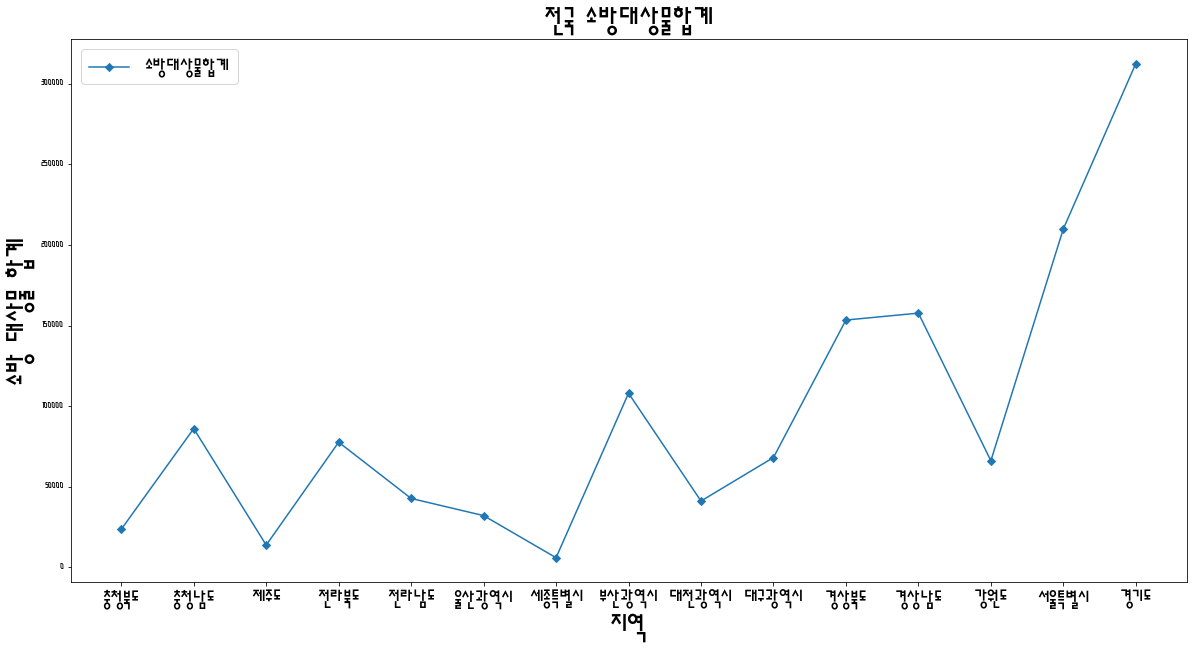

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.pyplot.xticks(fontsize=20)
plt.plot(대상.index, 대상['소방대상물합계'], marker='D')
plt.title('전국 소방대상물합계', fontsize=30)
plt.xlabel('지역', fontsize=30) 
plt.ylabel('소방 대상물 합계', fontsize=30) 
plt.legend(대상.columns, fontsize=20)

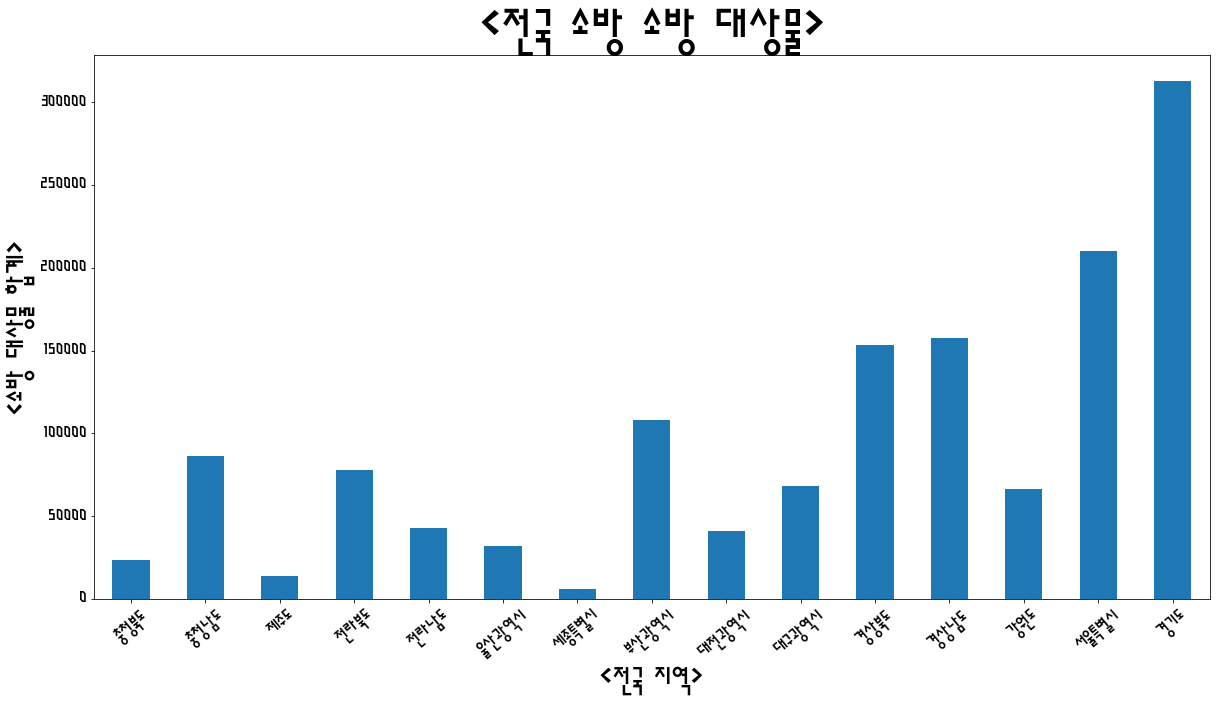

In [6]:
temp = 대상.plot(kind="bar", title="소방 대상물", legend=False, fontsize=20, rot='40')
plt.rcParams["figure.figsize"] = (10,20)
temp.set_title('<전국 소방 소방 대상물>', fontsize=50)
temp.set_xlabel('<전국 지역>', fontsize=30) 
temp.set_ylabel('<소방 대상물 합계>', fontsize=30) 
plt.show()

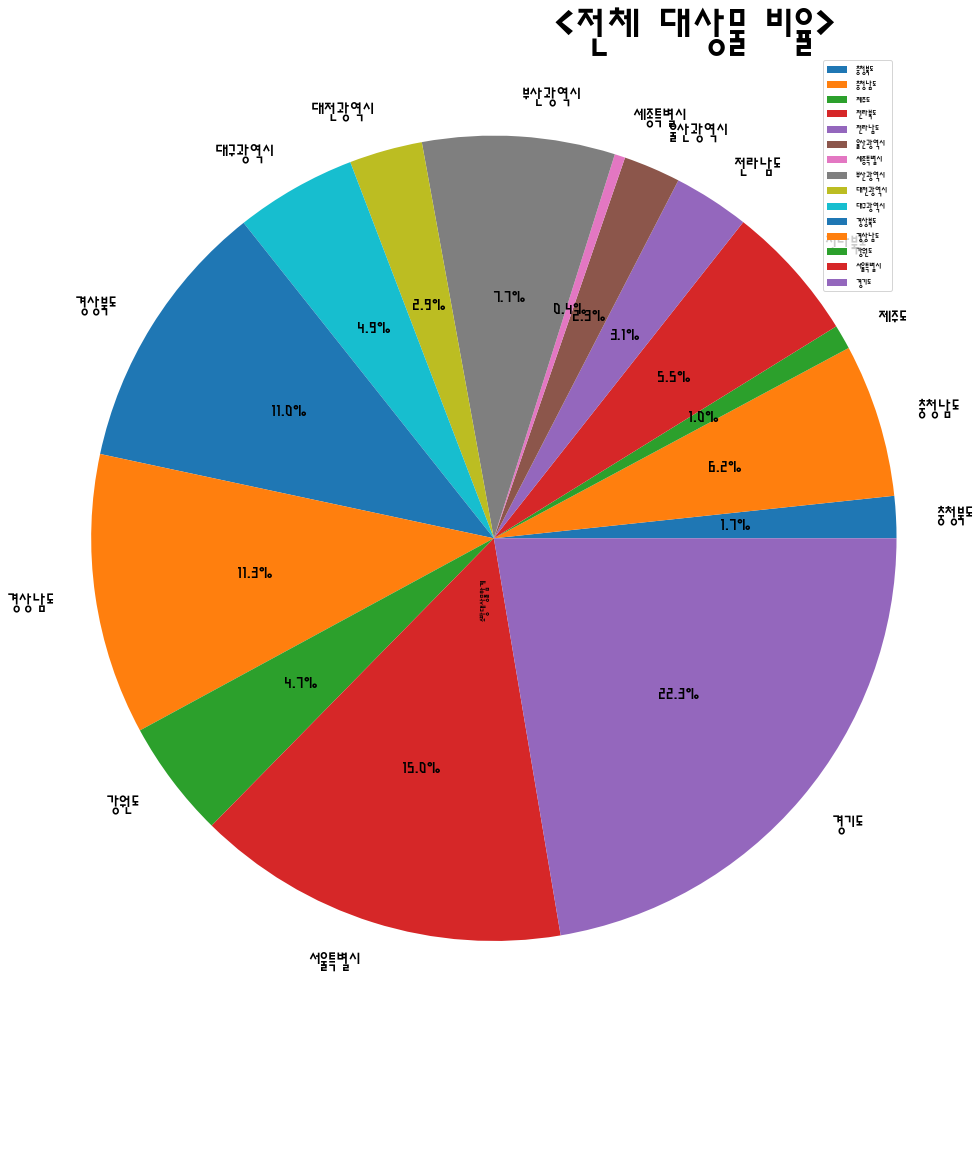

In [7]:
tile = 대상.plot.pie(autopct='%.1f%%', fontsize=20, subplots=True)
plt.title("<전체 대상물 비율>", fontsize=50)
plt.axis([0,1,-1.5,1.2])
plt.show()

In [8]:
화재 = pd.read_excel("화재 수정(10국).xlsx")

In [9]:
화재 = 화재.rename(columns={'행정구역별':'지역'})

In [10]:
화재 = 화재.set_index('지역')

In [11]:
화재_total = 화재['2017년 화재 발생 건수 (건)']

In [12]:
화재_total = pd.DataFrame(화재_total)

In [13]:
화재_total = 화재_total.rename(columns={'2017년 화재 발생 건수 (건)':'화재 발생 수'})

In [14]:
화재_total

화재 발생 수
지역            
서울특별시     5978
경기도      11407
강원도       2364
충청북도      1554
충청남도      4150
전라북도      1974
전라남도      3886
경상북도      4429
경상남도      7685
제주도        751

In [15]:
대상 = 대상 / 20

In [16]:
대상_total = 대상

In [17]:
대상_total = 대상_total.reset_index()

In [18]:
대상_total

index   소방대상물합계
0    충청북도   1178.60
1    충청남도   4303.85
2     제주도    689.20
3    전라북도   3881.55
4    전라남도   2136.55
5   울산광역시   1604.30
6   세종특별시    297.35
7   부산광역시   5401.25
8   대전광역시   2056.35
9   대구광역시   3406.95
10   경상북도   7672.85
11   경상남도   7887.20
12    강원도   3307.15
13  서울특별시  10500.50
14    경기도  15632.55

In [19]:
대상_total.loc[11,['소방대상물합계']] = 대상_total.loc[11,['소방대상물합계']]+ 대상_total.loc[5,['소방대상물합계']] + 대상_total.loc[7,['소방대상물합계']]
대상_total.loc[1,['소방대상물합계']] = 대상_total.loc[1,['소방대상물합계']]+ 대상_total.loc[8,['소방대상물합계']] + 대상_total.loc[6,['소방대상물합계']]
대상_total.loc[10,['소방대상물합계']] = 대상_total.loc[10,['소방대상물합계']]+ 대상_total.loc[9,['소방대상물합계']]

In [20]:
대상_total = 대상_total.drop([5,6,7,8,9])

In [21]:
대상_total = 대상_total.sort_values(by='index',ascending=True)


In [22]:
대상_total

index   소방대상물합계
12    강원도   3307.15
14    경기도  15632.55
11   경상남도  14892.75
10   경상북도  11079.80
13  서울특별시  10500.50
4    전라남도   2136.55
3    전라북도   3881.55
2     제주도    689.20
1    충청남도   6657.55
0    충청북도   1178.60

In [23]:
대상_total = 대상_total.rename(columns={'index':'지역'})

In [24]:
대상_total = 대상_total.set_index('지역')

In [25]:
대상_total

소방대상물합계
지역             
강원도     3307.15
경기도    15632.55
경상남도   14892.75
경상북도   11079.80
서울특별시  10500.50
전라남도    2136.55
전라북도    3881.55
제주도      689.20
충청남도    6657.55
충청북도    1178.60

In [26]:
대상

소방대상물합계
충청북도    1178.60
충청남도    4303.85
제주도      689.20
전라북도    3881.55
전라남도    2136.55
울산광역시   1604.30
세종특별시    297.35
부산광역시   5401.25
대전광역시   2056.35
대구광역시   3406.95
경상북도    7672.85
경상남도    7887.20
강원도     3307.15
서울특별시  10500.50
경기도    15632.55

In [27]:
화재_total

화재 발생 수
지역            
서울특별시     5978
경기도      11407
강원도       2364
충청북도      1554
충청남도      4150
전라북도      1974
전라남도      3886
경상북도      4429
경상남도      7685
제주도        751

In [28]:
인원 = pd.read_excel("전체지역_소방공무원.xlsx")

In [29]:
인원 = 인원.reset_index()

In [30]:
인원 = 인원.rename(columns={'index':'지역'})

In [31]:
인원.loc[0,['지역']] = '서울특별시'
인원.loc[1,['지역']] = '경기도'
인원.loc[2,['지역']] = '강원도'
인원.loc[3,['지역']] = '충청남도'
인원.loc[4,['지역']] = '충청북도'
인원.loc[5,['지역']] = '전라남도'
인원.loc[6,['지역']] = '전라북도'
인원.loc[7,['지역']] = '경상남도'
인원.loc[8,['지역']] = '경상북도'
인원.loc[9,['지역']] = '제주도'

In [32]:
인원 = 인원.drop(['2013년','2014년','2015년'], axis=1)

In [33]:
인원 = 인원.rename(columns={'2016년':'소방공무원수'})

In [34]:
인원 = 인원.set_index('지역')

In [35]:
merge = pd.merge(대상_total, 화재_total, on='지역', how='inner')
merge = pd.merge(merge, 인원, on='지역', how='inner')
merge

소방대상물합계  화재 발생 수  소방공무원수
지역                              
강원도     3307.15     2364    2591
경기도    15632.55    11407    5538
경상남도   14892.75     7685    3024
경상북도   11079.80     4429    3166
서울특별시  10500.50     5978    6902
전라남도    2136.55     3886    2266
전라북도    3881.55     1974    1985
제주도      689.20      751     704
충청남도    6657.55     4150    2424
충청북도    1178.60     1554    1617

In [36]:
df1 = pd.read_excel('2017년 개인보호 장비 현황.xlsx',encoding='ms949')
df1 = df1.drop([0,1],axis=0)
df1 = df1.rename(columns={'본부별':'지 역'})
df1 = df1.drop(['공 기','방화복','헬 멧','안전화','안전장갑','방화두건'],axis=1)
df1 = df1.set_index('지 역')


In [37]:
df1 = df1.reset_index()

In [38]:
df1.columns

Index(['지 역', '합 계'], dtype='object')

In [39]:
df1.loc[0,['지 역']] = '서울특별시'
df1.loc[1,['지 역']] = '경기도'
df1.loc[2,['지 역']] = '강원도'
df1.loc[3,['지 역']] = '충청북도'
df1.loc[4,['지 역']] = '충청남도'
df1.loc[5,['지 역']] = '전라북도'
df1.loc[6,['지 역']] = '전라남도'
df1.loc[7,['지 역']] = '경상북도'
df1.loc[8,['지 역']] = '경상남도'
df1.loc[9,['지 역']] = '제주도'

In [40]:
df1 = df1.rename(columns={'지 역':'지역','합 계':'개인보호장비총합'})

In [41]:
df1 = df1.set_index('지역')

In [42]:
merge = pd.merge(merge, df1, on='지역', how='inner')


In [43]:
merge = merge.reset_index()

In [44]:
merge 

지역   소방대상물합계  화재 발생 수  소방공무원수  개인보호장비총합
0    강원도   3307.15     2364    2591   32594.0
1    경기도  15632.55    11407    5538   96433.0
2   경상남도  14892.75     7685    3024   73966.0
3   경상북도  11079.80     4429    3166   62436.0
4  서울특별시  10500.50     5978    6902   48469.0
5   전라남도   2136.55     3886    2266   35180.0
6   전라북도   3881.55     1974    1985   23929.0
7    제주도    689.20      751     704   10173.0
8   충청남도   6657.55     4150    2424   45323.0
9   충청북도   1178.60     1554    1617   24249.0

In [45]:
merge.loc[10,['지역']] = '전체'

In [46]:
merge = merge.replace(np.nan, 0)

In [47]:
merge = merge.set_index('지역')

In [48]:
merge =np.transpose(merge)

In [49]:
merge

지역             강원도       경기도      경상남도     경상북도    서울특별시      전라남도      전라북도  \
소방대상물합계    3307.15  15632.55  14892.75  11079.8  10500.5   2136.55   3881.55   
화재 발생 수    2364.00  11407.00   7685.00   4429.0   5978.0   3886.00   1974.00   
소방공무원수     2591.00   5538.00   3024.00   3166.0   6902.0   2266.00   1985.00   
개인보호장비총합  32594.00  96433.00  73966.00  62436.0  48469.0  35180.00  23929.00   

지역            제주도      충청남도     충청북도   전체  
소방대상물합계     689.2   6657.55   1178.6  0.0  
화재 발생 수     751.0   4150.00   1554.0  0.0  
소방공무원수      704.0   2424.00   1617.0  0.0  
개인보호장비총합  10173.0  45323.00  24249.0  0.0

In [50]:
merge['전체'] = merge['강원도'] + merge['경기도'] + merge['경상남도'] + merge['경상북도'] + merge['서울특별시'] + merge['전라남도'] + merge['전라북도'] + merge['제주도'] + merge['충청남도'] + merge['충청북도']

In [51]:
merge =np.transpose(merge)

In [52]:
merge

소방대상물합계  화재 발생 수   소방공무원수  개인보호장비총합
지역                                         
강원도     3307.15   2364.0   2591.0   32594.0
경기도    15632.55  11407.0   5538.0   96433.0
경상남도   14892.75   7685.0   3024.0   73966.0
경상북도   11079.80   4429.0   3166.0   62436.0
서울특별시  10500.50   5978.0   6902.0   48469.0
전라남도    2136.55   3886.0   2266.0   35180.0
전라북도    3881.55   1974.0   1985.0   23929.0
제주도      689.20    751.0    704.0   10173.0
충청남도    6657.55   4150.0   2424.0   45323.0
충청북도    1178.60   1554.0   1617.0   24249.0
전체     69956.20  44178.0  30217.0  452752.0

In [53]:
merge_전체 = merge.drop(index='전체')

In [54]:
merge_전체

소방대상물합계  화재 발생 수  소방공무원수  개인보호장비총합
지역                                        
강원도     3307.15   2364.0  2591.0   32594.0
경기도    15632.55  11407.0  5538.0   96433.0
경상남도   14892.75   7685.0  3024.0   73966.0
경상북도   11079.80   4429.0  3166.0   62436.0
서울특별시  10500.50   5978.0  6902.0   48469.0
전라남도    2136.55   3886.0  2266.0   35180.0
전라북도    3881.55   1974.0  1985.0   23929.0
제주도      689.20    751.0   704.0   10173.0
충청남도    6657.55   4150.0  2424.0   45323.0
충청북도    1178.60   1554.0  1617.0   24249.0

In [56]:
temp = merge['소방대상물합계']
temp = pd.DataFrame(temp)
temp2 = merge['화재 발생 수']
temp2 = pd.DataFrame(temp2)
화재_대상 = pd.merge(temp, temp2, on='지역', how='inner')

In [57]:
tn = merge['소방대상물합계']
tn = pd.DataFrame(tn)
tn1 = merge['소방공무원수']
tn1 = pd.DataFrame(tn1)
화재_인원 = pd.merge(tn, tn1, on='지역', how='inner')

In [58]:
pn = merge['소방대상물합계']
pn

지역
강원도       3307.15
경기도      15632.55
경상남도     14892.75
경상북도     11079.80
서울특별시    10500.50
전라남도      2136.55
전라북도      3881.55
제주도        689.20
충청남도      6657.55
충청북도      1178.60
전체       69956.20
Name: 소방대상물합계, dtype: float64

In [59]:
number = []
for i in range (0,10,1):
    count = pn[i] / pn[10] * 100
    number.append(count)

number = pd.DataFrame(number)
number = number.rename(columns={0:'소방대상물비율'})
number

소방대상물비율
0   4.727458
1  22.346197
2  21.288678
3  15.838196
4  15.010106
5   3.054125
6   5.548543
7   0.985188
8   9.516740
9   1.684768

In [60]:
number = number.reset_index()
number = number.rename(columns={'index':'지역'})

In [61]:
number

지역    소방대상물비율
0   0   4.727458
1   1  22.346197
2   2  21.288678
3   3  15.838196
4   4  15.010106
5   5   3.054125
6   6   5.548543
7   7   0.985188
8   8   9.516740
9   9   1.684768

In [62]:
number.loc[0,['지역']] = '서울특별시'
number.loc[1,['지역']] = '경기도'
number.loc[2,['지역']] = '강원도'
number.loc[3,['지역']] = '충청북도'
number.loc[4,['지역']] = '충청남도'
number.loc[5,['지역']] = '전라북도'
number.loc[6,['지역']] = '전라남도'
number.loc[7,['지역']] = '경상북도'
number.loc[8,['지역']] = '경상남도'
number.loc[9,['지역']] = '제주도'

In [63]:
number = number.set_index('지역')

In [64]:
number

소방대상물비율
지역              
서울특별시   4.727458
경기도    22.346197
강원도    21.288678
충청북도   15.838196
충청남도   15.010106
전라북도    3.054125
전라남도    5.548543
경상북도    0.985188
경상남도    9.516740
제주도     1.684768

In [65]:
merge = pd.merge(merge, number,on='지역',how='outer')
merge

소방대상물합계  화재 발생 수   소방공무원수  개인보호장비총합    소방대상물비율
지역                                                    
강원도     3307.15   2364.0   2591.0   32594.0  21.288678
경기도    15632.55  11407.0   5538.0   96433.0  22.346197
경상남도   14892.75   7685.0   3024.0   73966.0   9.516740
경상북도   11079.80   4429.0   3166.0   62436.0   0.985188
서울특별시  10500.50   5978.0   6902.0   48469.0   4.727458
전라남도    2136.55   3886.0   2266.0   35180.0   5.548543
전라북도    3881.55   1974.0   1985.0   23929.0   3.054125
제주도      689.20    751.0    704.0   10173.0   1.684768
충청남도    6657.55   4150.0   2424.0   45323.0  15.010106
충청북도    1178.60   1554.0   1617.0   24249.0  15.838196
전체     69956.20  44178.0  30217.0  452752.0        NaN

In [66]:
pn = merge['화재 발생 수']
number = []
for i in range (0,10,1):
    count = pn[i] / pn[10] * 100
    number.append(count)

number = pd.DataFrame(number)
number = number.rename(columns={0:'화재발생비율'})
number = number.reset_index()
number = number.rename(columns={'index':'지역'})

number.loc[0,['지역']] = '서울특별시'
number.loc[1,['지역']] = '경기도'
number.loc[2,['지역']] = '강원도'
number.loc[3,['지역']] = '충청북도'
number.loc[4,['지역']] = '충청남도'
number.loc[5,['지역']] = '전라북도'
number.loc[6,['지역']] = '전라남도'
number.loc[7,['지역']] = '경상북도'
number.loc[8,['지역']] = '경상남도'
number.loc[9,['지역']] = '제주도'

number = number.set_index('지역')

merge = pd.merge(merge, number,on='지역',how='outer')
merge

소방대상물합계  화재 발생 수   소방공무원수  개인보호장비총합    소방대상물비율     화재발생비율
지역                                                               
강원도     3307.15   2364.0   2591.0   32594.0  21.288678  17.395536
경기도    15632.55  11407.0   5538.0   96433.0  22.346197  25.820544
경상남도   14892.75   7685.0   3024.0   73966.0   9.516740   9.393816
경상북도   11079.80   4429.0   3166.0   62436.0   0.985188   1.699941
서울특별시  10500.50   5978.0   6902.0   48469.0   4.727458   5.351080
전라남도    2136.55   3886.0   2266.0   35180.0   5.548543   4.468287
전라북도    3881.55   1974.0   1985.0   23929.0   3.054125   8.796233
제주도      689.20    751.0    704.0   10173.0   1.684768   3.517588
충청남도    6657.55   4150.0   2424.0   45323.0  15.010106  13.531622
충청북도    1178.60   1554.0   1617.0   24249.0  15.838196  10.025352
전체     69956.20  44178.0  30217.0  452752.0        NaN        NaN

In [67]:
pn = merge['소방공무원수']
number = []
for i in range (0,10,1):
    count = pn[i] / pn[10] * 100
    number.append(count)

number = pd.DataFrame(number)
number = number.rename(columns={0:'소방공무원비율'})
number = number.reset_index()
number = number.rename(columns={'index':'지역'})

number.loc[0,['지역']] = '서울특별시'
number.loc[1,['지역']] = '경기도'
number.loc[2,['지역']] = '강원도'
number.loc[3,['지역']] = '충청북도'
number.loc[4,['지역']] = '충청남도'
number.loc[5,['지역']] = '전라북도'
number.loc[6,['지역']] = '전라남도'
number.loc[7,['지역']] = '경상북도'
number.loc[8,['지역']] = '경상남도'
number.loc[9,['지역']] = '제주도'

number = number.set_index('지역')

merge = pd.merge(merge, number,on='지역',how='outer')
merge

소방대상물합계  화재 발생 수   소방공무원수  개인보호장비총합    소방대상물비율     화재발생비율    소방공무원비율
지역                                                                          
강원도     3307.15   2364.0   2591.0   32594.0  21.288678  17.395536  10.007612
경기도    15632.55  11407.0   5538.0   96433.0  22.346197  25.820544  18.327432
경상남도   14892.75   7685.0   3024.0   73966.0   9.516740   9.393816   8.021974
경상북도   11079.80   4429.0   3166.0   62436.0   0.985188   1.699941   2.329814
서울특별시  10500.50   5978.0   6902.0   48469.0   4.727458   5.351080   8.574643
전라남도    2136.55   3886.0   2266.0   35180.0   5.548543   4.468287   6.569150
전라북도    3881.55   1974.0   1985.0   23929.0   3.054125   8.796233   7.499090
제주도      689.20    751.0    704.0   10173.0   1.684768   3.517588   5.351292
충청남도    6657.55   4150.0   2424.0   45323.0  15.010106  13.531622  22.841447
충청북도    1178.60   1554.0   1617.0   24249.0  15.838196  10.025352  10.477546
전체     69956.20  44178.0  30217.0  452752.0        NaN        NaN        NaN

In [68]:
pn = merge['개인보호장비총합']
number = []
for i in range (0,10,1):
    count = pn[i] / pn[10] * 100
    number.append(count)

number = pd.DataFrame(number)
number = number.rename(columns={0:'개인장비비율'})
number = number.reset_index()
number = number.rename(columns={'index':'지역'})

number.loc[0,['지역']] = '서울특별시'
number.loc[1,['지역']] = '경기도'
number.loc[2,['지역']] = '강원도'
number.loc[3,['지역']] = '충청북도'
number.loc[4,['지역']] = '충청남도'
number.loc[5,['지역']] = '전라북도'
number.loc[6,['지역']] = '전라남도'
number.loc[7,['지역']] = '경상북도'
number.loc[8,['지역']] = '경상남도'
number.loc[9,['지역']] = '제주도'

number = number.set_index('지역')

merge = pd.merge(merge, number,on='지역',how='outer')
merge

소방대상물합계  화재 발생 수   소방공무원수  개인보호장비총합    소방대상물비율     화재발생비율    소방공무원비율  \
지역                                                                             
강원도     3307.15   2364.0   2591.0   32594.0  21.288678  17.395536  10.007612   
경기도    15632.55  11407.0   5538.0   96433.0  22.346197  25.820544  18.327432   
경상남도   14892.75   7685.0   3024.0   73966.0   9.516740   9.393816   8.021974   
경상북도   11079.80   4429.0   3166.0   62436.0   0.985188   1.699941   2.329814   
서울특별시  10500.50   5978.0   6902.0   48469.0   4.727458   5.351080   8.574643   
전라남도    2136.55   3886.0   2266.0   35180.0   5.548543   4.468287   6.569150   
전라북도    3881.55   1974.0   1985.0   23929.0   3.054125   8.796233   7.499090   
제주도      689.20    751.0    704.0   10173.0   1.684768   3.517588   5.351292   
충청남도    6657.55   4150.0   2424.0   45323.0  15.010106  13.531622  22.841447   
충청북도    1178.60   1554.0   1617.0   24249.0  15.838196  10.025352  10.477546   
전체     69956.20  44178.0  30217.0  452752.0        NaN        NaN        NaN   

          개인장비비율  
지역                
강원도    16.336979  
경기도    21.299299  
경상남도   10.010558  
경상북도    2.246925  
서울특별시   7.199085  
전라남도    5.285233  
전라북도    7.770258  
제주도     5.355912  
충청남도   10.705419  
충청북도   13.790331  
전체           NaN

In [69]:
merge

소방대상물합계  화재 발생 수   소방공무원수  개인보호장비총합    소방대상물비율     화재발생비율    소방공무원비율  \
지역                                                                             
강원도     3307.15   2364.0   2591.0   32594.0  21.288678  17.395536  10.007612   
경기도    15632.55  11407.0   5538.0   96433.0  22.346197  25.820544  18.327432   
경상남도   14892.75   7685.0   3024.0   73966.0   9.516740   9.393816   8.021974   
경상북도   11079.80   4429.0   3166.0   62436.0   0.985188   1.699941   2.329814   
서울특별시  10500.50   5978.0   6902.0   48469.0   4.727458   5.351080   8.574643   
전라남도    2136.55   3886.0   2266.0   35180.0   5.548543   4.468287   6.569150   
전라북도    3881.55   1974.0   1985.0   23929.0   3.054125   8.796233   7.499090   
제주도      689.20    751.0    704.0   10173.0   1.684768   3.517588   5.351292   
충청남도    6657.55   4150.0   2424.0   45323.0  15.010106  13.531622  22.841447   
충청북도    1178.60   1554.0   1617.0   24249.0  15.838196  10.025352  10.477546   
전체     69956.20  44178.0  30217.0  452752.0        NaN        NaN        NaN   

          개인장비비율  
지역                
강원도    16.336979  
경기도    21.299299  
경상남도   10.010558  
경상북도    2.246925  
서울특별시   7.199085  
전라남도    5.285233  
전라북도    7.770258  
제주도     5.355912  
충청남도   10.705419  
충청북도   13.790331  
전체           NaN

In [70]:
merge_f = merge['화재발생비율']
merge_f = pd.DataFrame(merge_f)
merge_f = pd.merge(merge_f,pd.DataFrame(merge['소방대상물비율']),on='지역',how='inner')
merge_f = merge_f.drop(index='전체')
merge_f

화재발생비율    소방대상물비율
지역                         
강원도    17.395536  21.288678
경기도    25.820544  22.346197
경상남도    9.393816   9.516740
경상북도    1.699941   0.985188
서울특별시   5.351080   4.727458
전라남도    4.468287   5.548543
전라북도    8.796233   3.054125
제주도     3.517588   1.684768
충청남도   13.531622  15.010106
충청북도   10.025352  15.838196

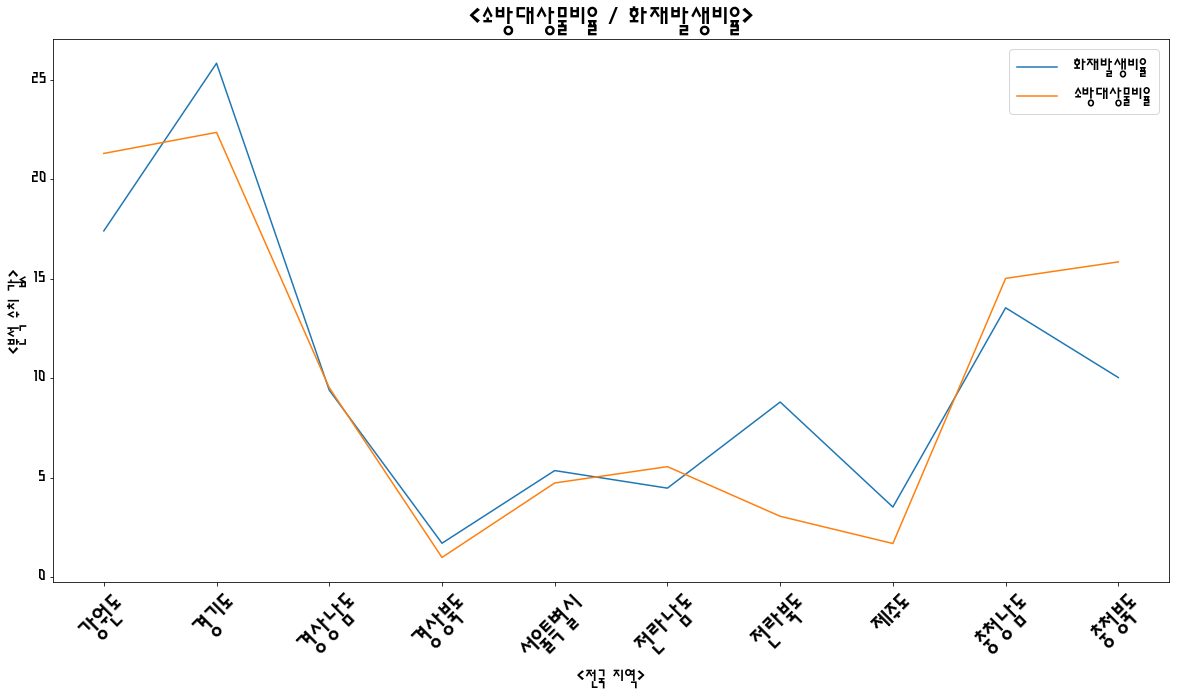

In [71]:
plt.rcParams["figure.figsize"] = (20, 10)
matplotlib.pyplot.xticks(fontsize=30)
matplotlib.pyplot.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(sorted(merge_f.index,reverse=False), merge_f['화재발생비율'])
plt.plot(sorted(merge_f.index,reverse=False), merge_f['소방대상물비율'])
plt.xticks(sorted(merge_f.index,reverse=False), merge.index,rotation='45')
plt.title('<소방대상물비율 / 화재발생비율>', fontsize=30)
plt.xlabel('<전국 지역>', fontsize=20) 
plt.ylabel('<분석 수치 값>', fontsize=20) 
plt.legend(merge_f.columns, fontsize=20)

In [72]:
merge_f = merge['화재발생비율']
merge_f = pd.DataFrame(merge_f)
merge_f = pd.merge(merge_f,pd.DataFrame(merge['소방공무원비율']),on='지역',how='inner')
merge_f = merge_f.drop(index='전체')
merge_f

화재발생비율    소방공무원비율
지역                         
강원도    17.395536  10.007612
경기도    25.820544  18.327432
경상남도    9.393816   8.021974
경상북도    1.699941   2.329814
서울특별시   5.351080   8.574643
전라남도    4.468287   6.569150
전라북도    8.796233   7.499090
제주도     3.517588   5.351292
충청남도   13.531622  22.841447
충청북도   10.025352  10.477546

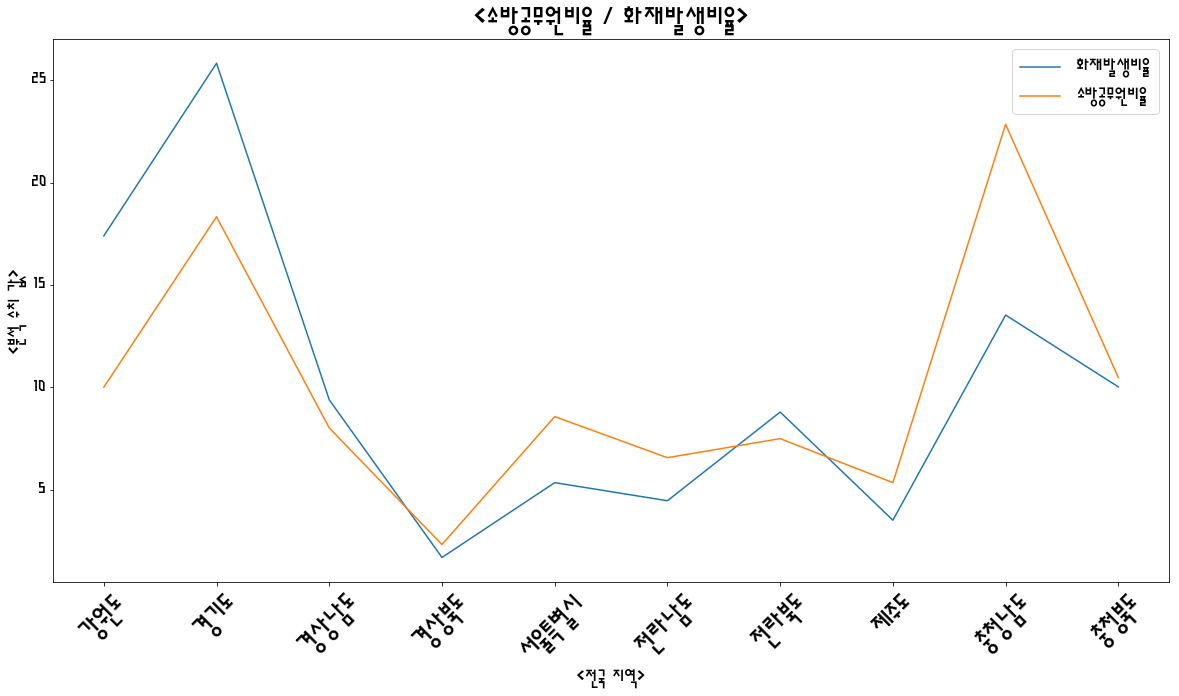

In [73]:
plt.rcParams["figure.figsize"] = (20, 10)
matplotlib.pyplot.xticks(fontsize=30)
matplotlib.pyplot.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(sorted(merge_f.index,reverse=False), merge_f['화재발생비율'])
plt.plot(sorted(merge_f.index,reverse=False), merge_f['소방공무원비율'])
plt.xticks(sorted(merge_f.index,reverse=False), merge.index,rotation='45')
plt.title('<소방공무원비율 / 화재발생비율>', fontsize=30)
plt.xlabel('<전국 지역>', fontsize=20) 
plt.ylabel('<분석 수치 값>', fontsize=20) 
plt.legend(merge_f.columns, fontsize=20)

In [74]:
merge_f = merge['화재발생비율']
merge_f = pd.DataFrame(merge_f)
merge_f = pd.merge(merge_f,pd.DataFrame(merge['개인장비비율']),on='지역',how='inner')
merge_f = merge_f.drop(index='전체')
merge_f

화재발생비율     개인장비비율
지역                         
강원도    17.395536  16.336979
경기도    25.820544  21.299299
경상남도    9.393816  10.010558
경상북도    1.699941   2.246925
서울특별시   5.351080   7.199085
전라남도    4.468287   5.285233
전라북도    8.796233   7.770258
제주도     3.517588   5.355912
충청남도   13.531622  10.705419
충청북도   10.025352  13.790331

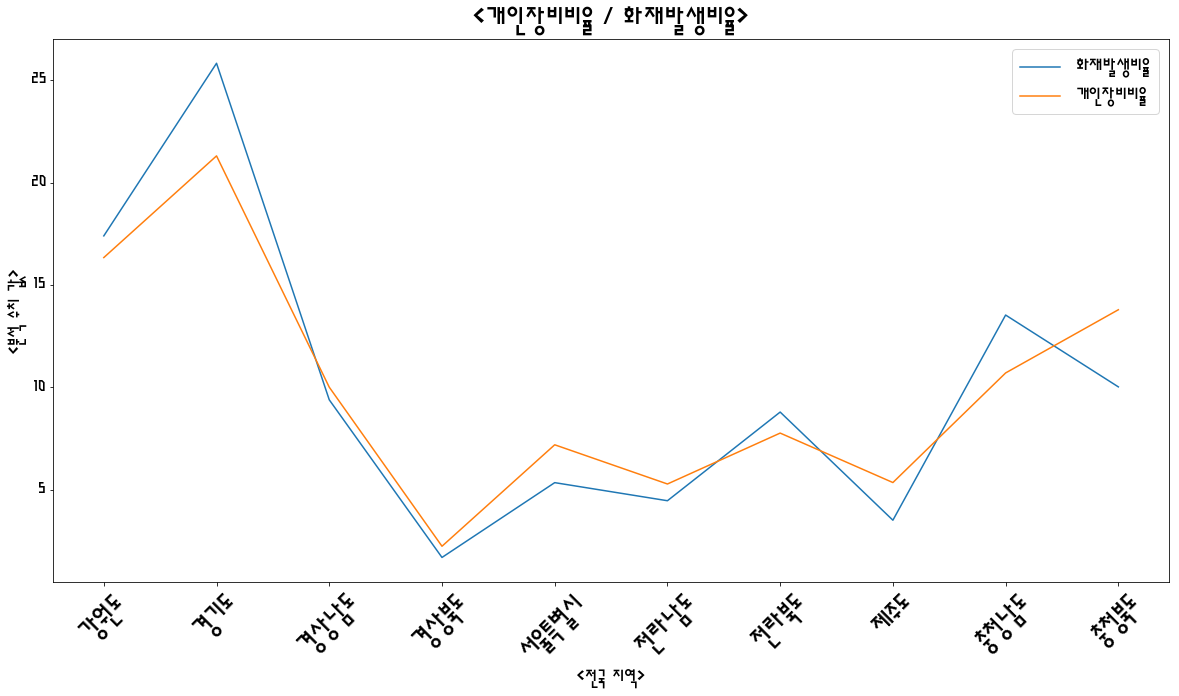

In [75]:
plt.rcParams["figure.figsize"] = (20, 10)
matplotlib.pyplot.xticks(fontsize=30)
matplotlib.pyplot.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(sorted(merge_f.index,reverse=False), merge_f['화재발생비율'])
plt.plot(sorted(merge_f.index,reverse=False), merge_f['개인장비비율'])
plt.xticks(sorted(merge_f.index,reverse=False), merge.index,rotation='45')
plt.title('<개인장비비율 / 화재발생비율>', fontsize=30)
plt.xlabel('<전국 지역>', fontsize=20) 
plt.ylabel('<분석 수치 값>', fontsize=20) 
plt.legend(merge_f.columns, fontsize=20)

In [76]:
merge_f = merge['소방공무원비율']
merge_f = pd.DataFrame(merge_f)
merge_f = pd.merge(merge_f,pd.DataFrame(merge['개인장비비율']),on='지역',how='inner')
merge_f = merge_f.drop(index='전체')
merge_f

소방공무원비율     개인장비비율
지역                         
강원도    10.007612  16.336979
경기도    18.327432  21.299299
경상남도    8.021974  10.010558
경상북도    2.329814   2.246925
서울특별시   8.574643   7.199085
전라남도    6.569150   5.285233
전라북도    7.499090   7.770258
제주도     5.351292   5.355912
충청남도   22.841447  10.705419
충청북도   10.477546  13.790331

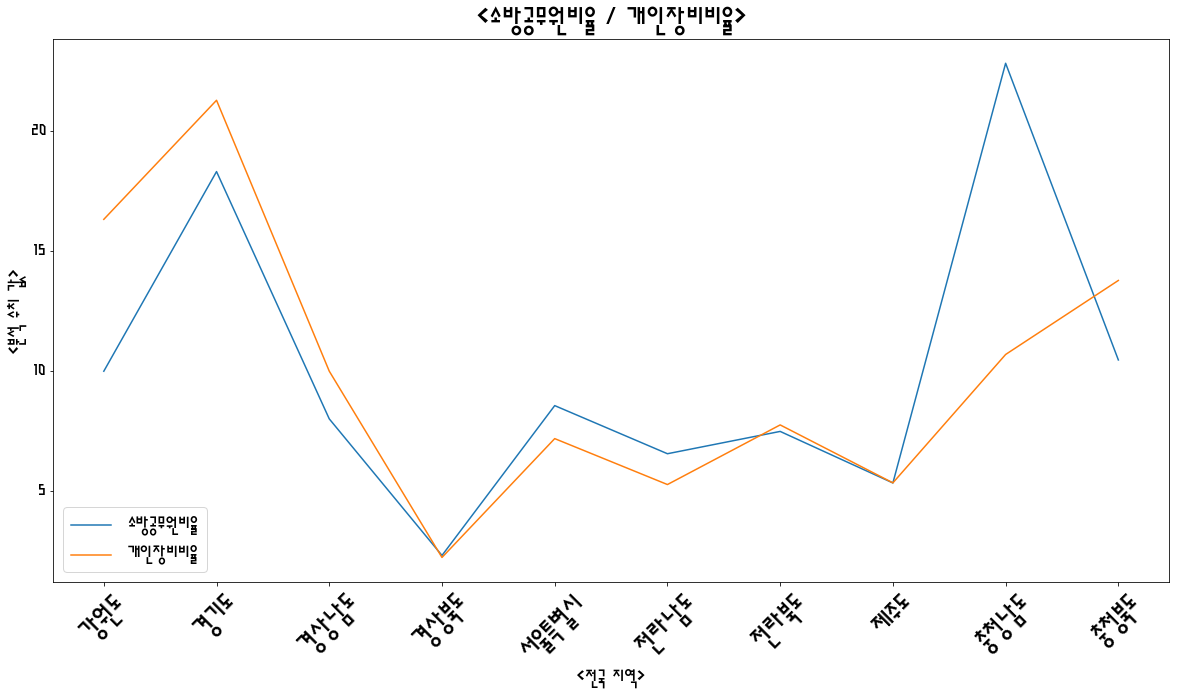

In [77]:
plt.rcParams["figure.figsize"] = (20, 10)
matplotlib.pyplot.xticks(fontsize=30)
matplotlib.pyplot.yticks(fontsize=20)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(sorted(merge_f.index,reverse=False), merge_f['소방공무원비율'])
plt.plot(sorted(merge_f.index,reverse=False), merge_f['개인장비비율'])
plt.xticks(sorted(merge_f.index,reverse=False), merge_f.index,rotation='45')
plt.title('<소방공무원비율 / 개인장비비율>', fontsize=30)
plt.xlabel('<전국 지역>', fontsize=20) 
plt.ylabel('<분석 수치 값>', fontsize=20) 
plt.legend(merge_f.columns, fontsize=20)